<a href="https://colab.research.google.com/github/soulaimane2/CNN_Small_Proj/blob/master/CNN_Cifar10_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Trying To improve the CNN with CIFAR
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
#from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
#from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
tf.__version__

'2.2.0'

In [21]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()
x_train , x_test = x_train / 255. , x_test / 255.
y_train , y_test = y_train.flatten() , y_test.flatten()
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [22]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape = x_train[0].shape),

                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D((2,2)),


                             tf.keras.layers.GlobalMaxPooling2D(),
                             
                             tf.keras.layers.Dense(1000,activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1000,activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1000,activation='relu'),
                             tf.keras.layers.Dense(K,activation="softmax")
])

In [13]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=50,epochs=10)

Epoch 1/10
1000/1000 [==============================] - 488s 488ms/step - loss: 1.3269 - accuracy: 0.5250 - val_loss: 1.1622 - val_accuracy: 0.5925
Epoch 2/10
1000/1000 [==============================] - 498s 498ms/step - loss: 0.8875 - accuracy: 0.6988 - val_loss: 0.8972 - val_accuracy: 0.6940
Epoch 3/10
1000/1000 [==============================] - 512s 512ms/step - loss: 0.6936 - accuracy: 0.7675 - val_loss: 0.7871 - val_accuracy: 0.7322
Epoch 4/10
1000/1000 [==============================] - 507s 507ms/step - loss: 0.5779 - accuracy: 0.8075 - val_loss: 0.7880 - val_accuracy: 0.7494
Epoch 5/10
1000/1000 [==============================] - 499s 499ms/step - loss: 0.4969 - accuracy: 0.8351 - val_loss: 0.6603 - val_accuracy: 0.7850
Epoch 6/10
1000/1000 [==============================] - 498s 498ms/step - loss: 0.4227 - accuracy: 0.8608 - val_loss: 0.6258 - val_accuracy: 0.7974
Epoch 7/10
1000/1000 [==============================] - 488s 488ms/step - loss: 0.3626 - accuracy: 0.8807 - val_

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 22s 70ms/step - loss: 0.6111 - accuracy: 0.8178


[0.6111260056495667, 0.817799985408783]

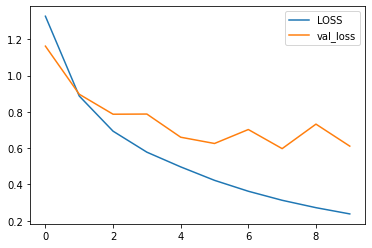

In [17]:
plt.plot(r.history['loss'],label='LOSS')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

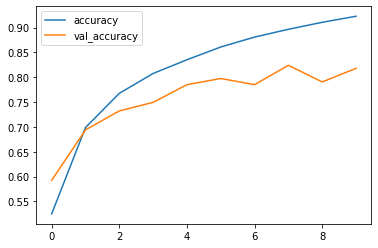

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [24]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
batch_size = 50
Data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = Data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch_ = x_train.shape[0] // batch_size
rs = model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch_,epochs=10)

Epoch 1/10
1000/1000 [==============================] - 492s 492ms/step - loss: 1.4458 - accuracy: 0.4795 - val_loss: 1.3034 - val_accuracy: 0.5512
Epoch 2/10
1000/1000 [==============================] - 529s 529ms/step - loss: 0.9780 - accuracy: 0.6621 - val_loss: 1.0272 - val_accuracy: 0.6490
Epoch 3/10
1000/1000 [==============================] - 523s 523ms/step - loss: 0.8126 - accuracy: 0.7260 - val_loss: 0.7853 - val_accuracy: 0.7360
Epoch 4/10
1000/1000 [==============================] - 515s 515ms/step - loss: 0.7089 - accuracy: 0.7618 - val_loss: 0.9090 - val_accuracy: 0.7234
Epoch 5/10
1000/1000 [==============================] - 524s 524ms/step - loss: 0.6431 - accuracy: 0.7863 - val_loss: 0.6466 - val_accuracy: 0.7832
Epoch 6/10
1000/1000 [==============================] - 510s 510ms/step - loss: 0.5988 - accuracy: 0.8018 - val_loss: 0.5752 - val_accuracy: 0.8094
Epoch 7/10
1000/1000 [==============================] - 507s 507ms/step - loss: 0.5602 - accuracy: 0.8154 - val_

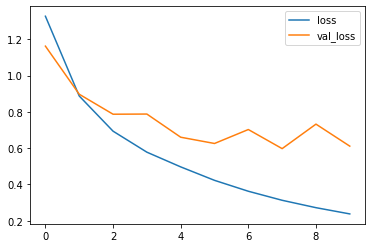

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

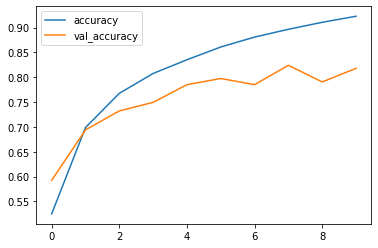

In [28]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 22s 71ms/step - loss: 0.5412 - accuracy: 0.8223


[0.5411513447761536, 0.8223000168800354]